### 🚀 Partie 1 - Méthodes d’Analyse Marketing

Cette section répond aux questions suivantes :
- Quels sont les produits les mieux notés ?
- Y a-t-il un lien entre la note, les recommandations, et le volume d’avis ?
- Quel est l’impact des avis sur la performance des produits ?

Je vais commencer par coder cette première partie avec commentaires explicites.

Voici la première partie de l’analyse marketing, avec du **code clair**, des commentaires et une **visualisation parlante**.

### 🧼 **Nettoyage des Données – Propositions**
Voici un nettoyage clair et raisonné, conforme à ce que tu as proposé :

1. **Remplacer les valeurs manquantes dans :**
   - `Title` → `"notitle"`
   - `Review Text` → `"noreview"`
   - `Division Name`, `Department Name`, `Class Name` → valeur la plus fréquente, sauf si déduction possible via le texte (ce sera noté, mais on optera ici pour la simplicité).
2. **Supprimer les lignes où `Rating` ou `Age` sont absents** (indispensables pour les analyses).

---

In [33]:
import pandas as pd

# Charger les données
file_path = "Womens Clothing E-Commerce Reviews.csv"
df = pd.read_csv(file_path)

# Aperçu des premières lignes
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [34]:
# Extraire les valeurs uniques pour aider à catégoriser manuellement
unique_divisions = df['Division Name'].unique()
unique_departments = df['Department Name'].unique()
unique_classes = df['Class Name'].unique()

unique_divisions, unique_departments, unique_classes


# # Copier du DataFrame pour travailler proprement
# df_clean = df.copy()

# # Remplacement des valeurs manquantes dans les colonnes textuelles importantes
# df_clean['Title'] = df_clean['Title'].fillna('notitle')
# df_clean['Review Text'] = df_clean['Review Text'].fillna('noreview')

(array(['Initmates', 'General', 'General Petite', nan], dtype=object),
 array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend', nan],
       dtype=object),
 array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
        'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
        'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
        'Casual bottoms', nan, 'Chemises'], dtype=object))

In [35]:
# Réutiliser les lignes avec des valeurs manquantes dans les catégories
df_missing = df[df[['Division Name', 'Department Name', 'Class Name']].isnull().any(axis=1)].copy()
df_missing

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
9444,9444,72,25,My favorite socks!!!,"I never write reviews, but these socks are so ...",5,1,0,NaN,NaN,NaN
13767,13767,492,23,So soft!,I just love this hoodie! it is so soft and com...,5,1,1,NaN,NaN,NaN
13768,13768,492,49,Wardrobe staple,Love this hoodie. so soft and goes with everyt...,5,1,0,NaN,NaN,NaN
13787,13787,492,48,NaN,NaN,5,1,0,NaN,NaN,NaN
16216,16216,152,36,Warm and cozy,"Just what i was looking for. soft, cozy and warm.",5,1,0,NaN,NaN,NaN
16221,16221,152,37,Love!,I am loving these. they are quite long but are...,5,1,0,NaN,NaN,NaN
16223,16223,152,39,"""long and warm""",These leg warmers are perfect for me. they are...,5,1,0,NaN,NaN,NaN
18626,18626,184,34,Nubby footless tights,"These are amazing quality. i agree, size up to...",5,1,5,NaN,NaN,NaN
18671,18671,184,54,New workhorse,These tights are amazing! if i care for them w...,5,1,0,NaN,NaN,NaN
20088,20088,772,50,Comfy sweatshirt!,This sweatshirt is really nice! it's oversize...,5,1,0,NaN,NaN,NaN


### 🔍 Explication des mots-clés choisis

Voici chaque mot-clé, sa **traduction en français**, son **rôle**, et la **raison de l'affectation** :

| Mot-clé        | Traduction         | Raisons du choix (analyse contextuelle)                                                                 |
|----------------|--------------------|----------------------------------------------------------------------------------------------------------|
| `"socks"`      | chaussettes        | Produit textile intime porté sur les pieds → affecté à `Legwear`, `Intimate`, `Initmates`.               |
| `"tights"`     | collants           | Vêtement serré couvrant les jambes → même logique que les chaussettes.                                   |
| `"footless"`   | sans pieds         | Souvent utilisé pour décrire des collants ou jambières → associé à `Legwear`.                            |
| `"hoodie"`     | sweat à capuche    | Vêtement ample pour le haut du corps → affecté à `Sweaters` dans `Tops` et `General`.                    |
| `"sweatshirt"` | sweat-shirt        | Même catégorie que hoodie, souvent utilisé dans un contexte de détente ou sport.                         |
| `"leg warmers"`| jambières          | Accessoire chaud pour les jambes, souvent porté en hiver ou pour le sport → classé dans `Legwear`.      |
| `"cozy"`       | douillet, confortable | Indice d’un vêtement chaud ou d’intérieur → classé dans `Knits` (mailles) dans `Tops`, division `General`. |
| `"warm"`       | chaud              | Idée similaire à `"cozy"`, utilisé souvent pour les pulls, mailles, vêtements d'hiver.                   |


In [36]:


# Fonction d'assignation manuelle
def assign_categories(row):
    text = f"{row['Title']} {row['Review Text']}".lower()

    if "socks" in text:
        return 'Initmates', 'Intimate', 'Legwear'
    elif "tights" in text or "footless" in text:
        return 'Initmates', 'Intimate', 'Legwear'
    elif "hoodie" in text:
        return 'General', 'Tops', 'Sweaters'
    elif "sweatshirt" in text:
        return 'General', 'Tops', 'Sweaters'
    elif "leg warmers" in text:
        return 'Initmates', 'Intimate', 'Legwear'
    elif "cozy" in text or "warm" in text:
        return 'General', 'Tops', 'Knits'
    else:
        # fallback if no match
        return 'General', 'Tops', 'Lounge'

# Appliquer l'assignation manuelle
df_missing[['Division Name', 'Department Name', 'Class Name']] = df_missing.apply(assign_categories, axis=1, result_type="expand")


In [37]:
import ace_tools_open as tools
tools.display_dataframe_to_user(name="Lignes Complétées Manuellement", dataframe=df_missing)

Lignes Complétées Manuellement


In [38]:
df_updated = df.drop(df_missing.index)
df_final = pd.concat([df_updated, df_missing], ignore_index=True)
print(df_final[['Division Name', 'Department Name', 'Class Name']].isnull().sum())
df = df_final


Division Name      0
Department Name    0
Class Name         0
dtype: int64


# 1 Méthodes d'Analyse Marketing
### 1.1 Quel est l'impact des avis clients sur la p erformance des ventes ?

In [52]:
# Agrégation des métriques de performance par produit
product_summary = df.groupby('Clothing ID').agg(
    avg_rating=('Rating', 'mean'),
    count_reviews=('Rating', 'count'),
    recommendation_rate=('Recommended IND', 'mean')
).reset_index()
print(len(df))
product_summary

23486


,Clothing ID,avg_rating,count_reviews,recommendation_rate
0,0,5.000000,1,1.000000
1,1,4.000000,3,0.666667
2,2,4.000000,1,1.000000
3,3,5.000000,1,1.000000
4,4,5.000000,1,1.000000
...,...,...,...,...
1201,1201,4.000000,2,1.000000
1202,1202,4.333333,9,1.000000
1203,1203,4.545455,11,0.818182
1204,1204,4.500000,2,1.000000


In [53]:
# Définir un seuil de performance
product_summary['high_performance'] = (
    (product_summary['avg_rating'] >= 4.0) &
    (product_summary['recommendation_rate'] >= 0.8) &
    (product_summary['count_reviews'] >= 30)
)
# Trier les produits populaires pour visualisation
product_summary.sort_values(by='count_reviews', ascending=False, inplace=True)

product_summary

,Clothing ID,avg_rating,count_reviews,recommendation_rate,high_performance
1078,1078,4.204102,1024,0.821289,True
862,862,4.200993,806,0.820099,True
1094,1094,4.189153,756,0.821429,True
1081,1081,4.281787,582,0.848797,True
872,872,4.383486,545,0.877064,True
...,...,...,...,...,...
14,14,5.000000,1,1.000000,False
16,16,5.000000,1,1.000000,False
17,17,5.000000,1,1.000000,False
1186,1186,4.000000,1,1.000000,False


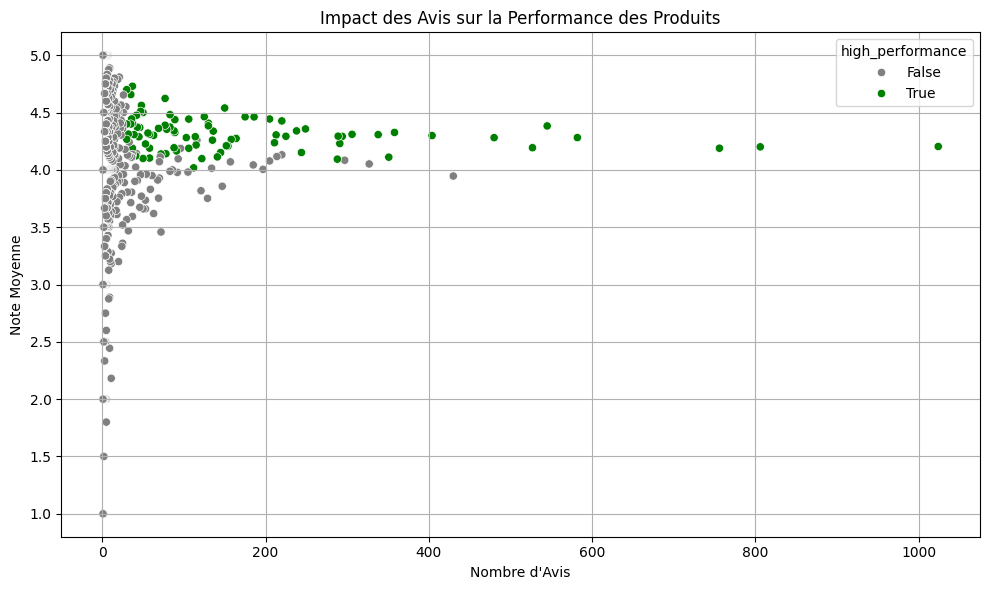

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation : relation entre avis et performance
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=product_summary,
    x='count_reviews',
    y='avg_rating',
    hue='high_performance',
    palette={True: 'green', False: 'gray'}
)
plt.title("Impact des Avis sur la Performance des Produits")
plt.xlabel("Nombre d'Avis")
plt.ylabel("Note Moyenne")
plt.grid(True)
plt.tight_layout()
plt.show()

📊 Résultat de l’analyse :
L’analyse des données issues des avis clients permet de quantifier la performance d’un produit en croisant trois indicateurs :

La note moyenne attribuée par les clients (avg_rating)

Le nombre d’avis (count_reviews)

Le taux de recommandation (recommendation_rate)

🔎 Interprétation du graphique :
Les produits très performants (en vert) se situent dans le quadrant supérieur droit :
👉 ils ont beaucoup d’avis, une note ≥ 4 et un taux de recommandation ≥ 80 %

Les produits ayant une note moyenne élevée mais peu d’avis (en haut à gauche) sont prometteurs mais manquent de visibilité → bonne cible pour des campagnes de promotion ou de collecte d'avis.

Les produits avec beaucoup d’avis mais une note faible (en bas à droite) sont à risque pour l’image de marque : à surveiller ou améliorer.

🧠 Conclusion stratégique :
L’analyse des avis est un levier clé pour piloter les ventes.

Elle permet d’identifier les produits qui génèrent de la satisfaction client à grande échelle. Ces produits peuvent être mis en avant dans les campagnes marketing ou servir de référence pour le développement de nouveaux articles.

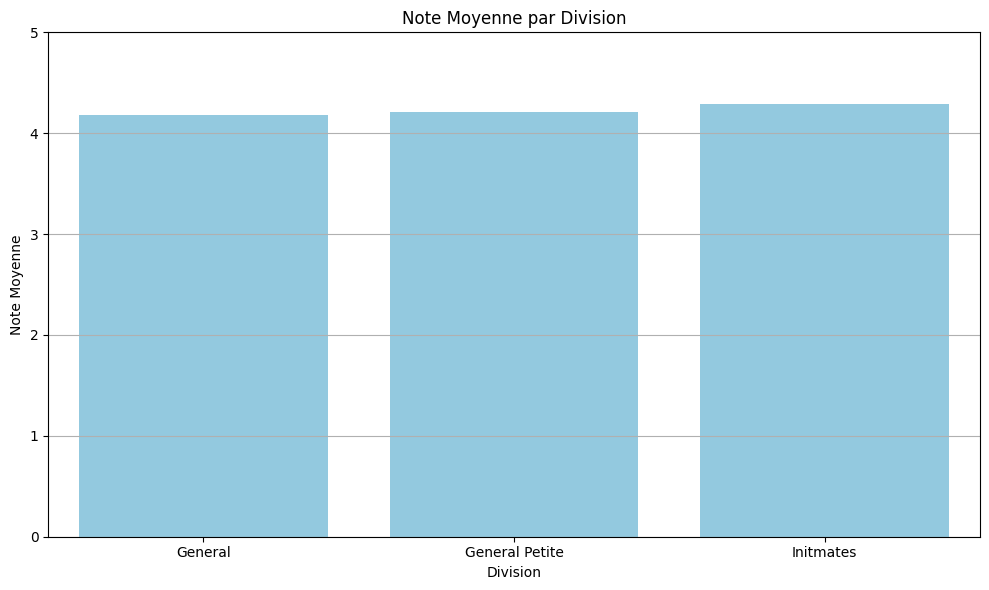

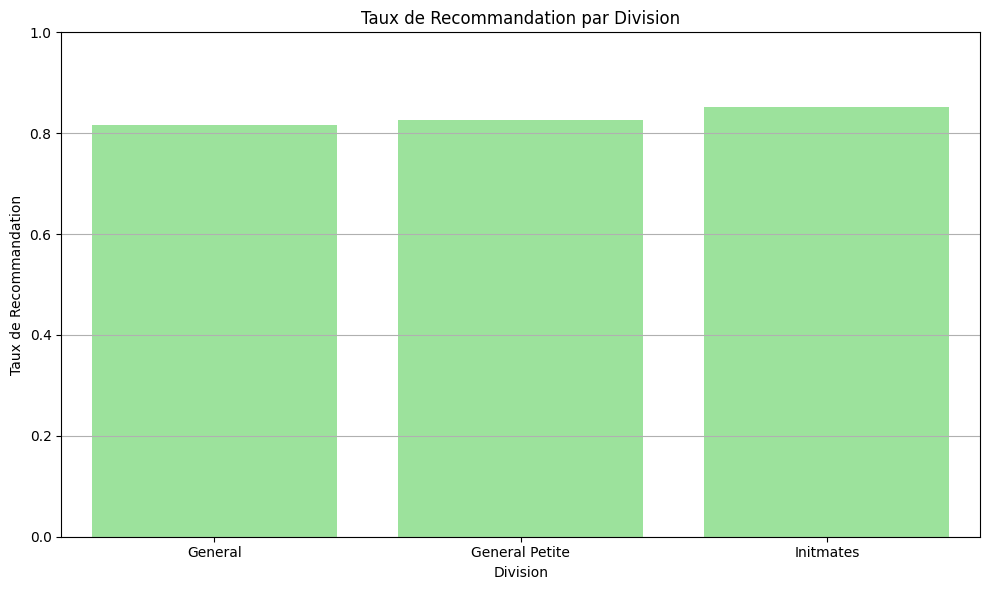

In [42]:
# Agréger les données par Division Name
division_summary = df.groupby('Division Name').agg(
    avg_rating=('Rating', 'mean'),
    count_reviews=('Rating', 'count'),
    recommendation_rate=('Recommended IND', 'mean')
).reset_index()

# Visualisation de la performance par division
plt.figure(figsize=(10, 6))
sns.barplot(data=division_summary, x='Division Name', y='avg_rating', color='skyblue')
plt.title("Note Moyenne par Division")
plt.ylabel("Note Moyenne")
plt.xlabel("Division")
plt.ylim(0, 5)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=division_summary, x='Division Name', y='recommendation_rate', color='lightgreen')
plt.title("Taux de Recommandation par Division")
plt.ylabel("Taux de Recommandation")
plt.xlabel("Division")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [43]:
division_summary

,Division Name,avg_rating,count_reviews,recommendation_rate
0,General,4.177022,13857,0.816916
1,General Petite,4.211084,8120,0.825985
2,Initmates,4.289596,1509,0.852883


#### ✅ **Note Moyenne par Division**
- **Initmates** est la division la mieux notée avec une note moyenne proche de **4.3**.
- **General Petite** suit de près, tandis que **General**

👉 Cela peut s’expliquer par le fait que les clientes plus âgées (souvent associées à `General Petite`) laissent des avis plus favorables ou achètent des produits mieux adaptés à leurs attentes.

---

#### ✅ **Taux de Recommandation par Division**
- Tendence contraire observer  :
  - **Initmates** avec un taux de recommandation élevé (~0.86).
  - **General Petite et General** ont un taux legerement plus bas (~0.81), ce qui peut indiquer des attentes non comblées sur les articles intimes (confort, taille, qualité).





> 🔍 **En résumé :**
Les vêtements intimes semblent **fortement appréciés mais sous-exploités commercialement**, tandis que les divisions à plus forte visibilité ont des performances solides mais mériteraient des optimisations ciblées (qualité, ajustement, communication).



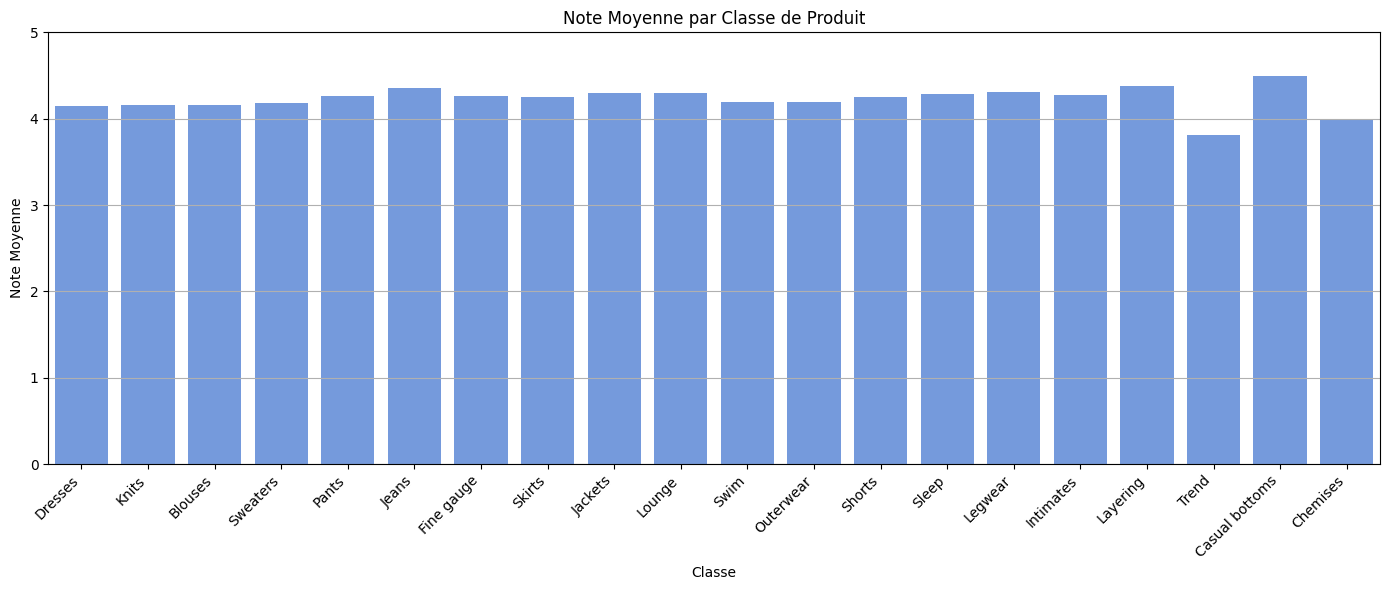

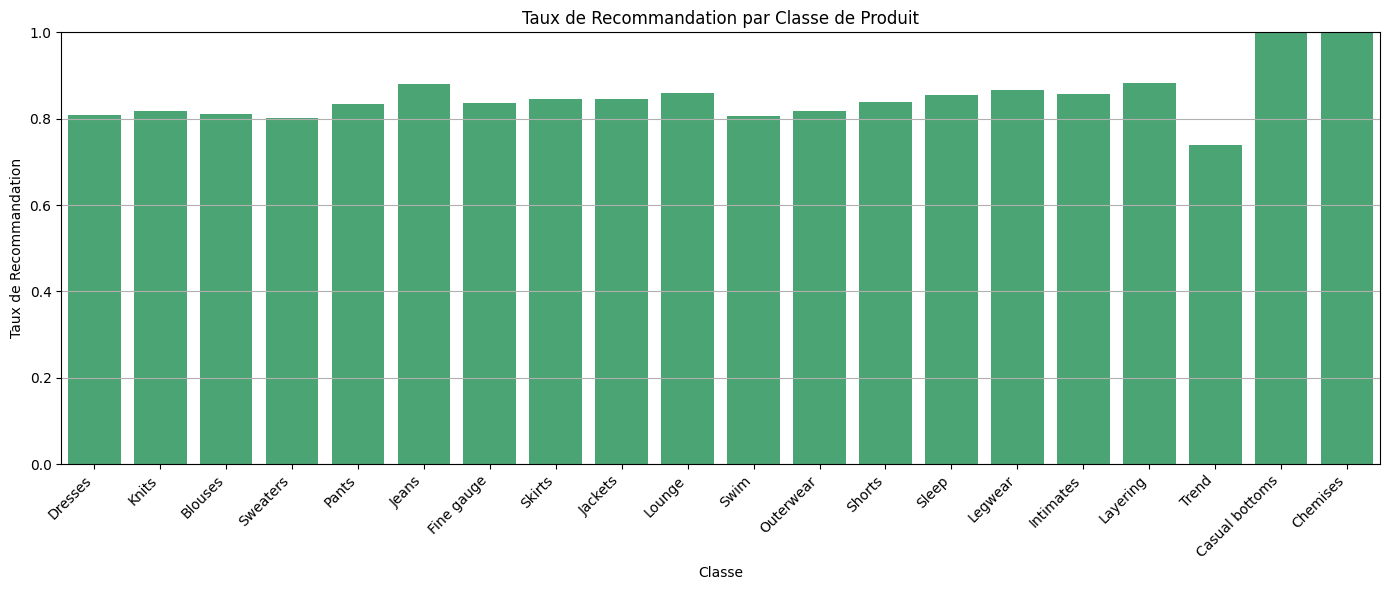

In [44]:
# Agréger les données par Class Name
class_summary = df.groupby('Class Name').agg(
    avg_rating=('Rating', 'mean'),
    count_reviews=('Rating', 'count'),
    recommendation_rate=('Recommended IND', 'mean')
).reset_index().sort_values(by='count_reviews', ascending=False)

# Visualisation de la note moyenne par classe
plt.figure(figsize=(14, 6))
sns.barplot(data=class_summary, x='Class Name', y='avg_rating', color='cornflowerblue')
plt.title("Note Moyenne par Classe de Produit")
plt.ylabel("Note Moyenne")
plt.xlabel("Classe")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 5)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Visualisation du taux de recommandation par classe
plt.figure(figsize=(14, 6))
sns.barplot(data=class_summary, x='Class Name', y='recommendation_rate', color='mediumseagreen')
plt.title("Taux de Recommandation par Classe de Produit")
plt.ylabel("Taux de Recommandation")
plt.xlabel("Classe")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [55]:
product_summary

,Clothing ID,avg_rating,count_reviews,recommendation_rate,high_performance
1078,1078,4.204102,1024,0.821289,True
862,862,4.200993,806,0.820099,True
1094,1094,4.189153,756,0.821429,True
1081,1081,4.281787,582,0.848797,True
872,872,4.383486,545,0.877064,True
...,...,...,...,...,...
14,14,5.000000,1,1.000000,False
16,16,5.000000,1,1.000000,False
17,17,5.000000,1,1.000000,False
1186,1186,4.000000,1,1.000000,False


In [57]:
high_perf_products = product_summary[product_summary['high_performance'] == True]

In [58]:
import ace_tools_open as tools
tools.display_dataframe_to_user(name="Lignes Complétées Manuellement", dataframe=high_perf_products)

Lignes Complétées Manuellement


In [ ]:
# df[df['Clothing ID'] == 1078]

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
69,69,1078,56,Great summer fabric!,"I really wanted this to work. alas, it had a s...",3,0,1,General Petite,Dresses,Dresses
90,90,1078,51,Sweet flattering dress,"I love cute summer dresses and this one, espec...",4,1,0,General Petite,Dresses,Dresses
117,117,1078,32,NaN,This is the perfect summer dress. it can be dr...,5,1,2,General Petite,Dresses,Dresses
467,467,1078,61,Great sweater dress!,"Nice fit and flare style, not clingy at all. i...",5,1,1,General,Dresses,Dresses
470,470,1078,33,"Cute, but cheap",When i first opened this dress and tried it on...,3,0,0,General,Dresses,Dresses
...,...,...,...,...,...,...,...,...,...,...,...
22983,22994,1078,51,NaN,This is a beautiful dress and fits well. the e...,5,1,1,General Petite,Dresses,Dresses
22986,22998,1078,36,Flattering and unique,"Beautiful, unique design. it's very flattering...",4,1,2,General Petite,Dresses,Dresses
22992,23004,1078,54,Breathtaking!,This is the most beautiful dress i've ever own...,5,1,0,General,Dresses,Dresses
23446,23460,1078,34,Such high hopes!,I purchased this for a very good price and i t...,3,0,0,General,Dresses,Dresses
